<a href="https://colab.research.google.com/github/TypeMIN/ML_study/blob/master/08_2_Image_Classification_with_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기

In [28]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기

In [20]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [21]:
model.add(keras.layers.MaxPooling2D(2))

In [22]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [23]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 100)              

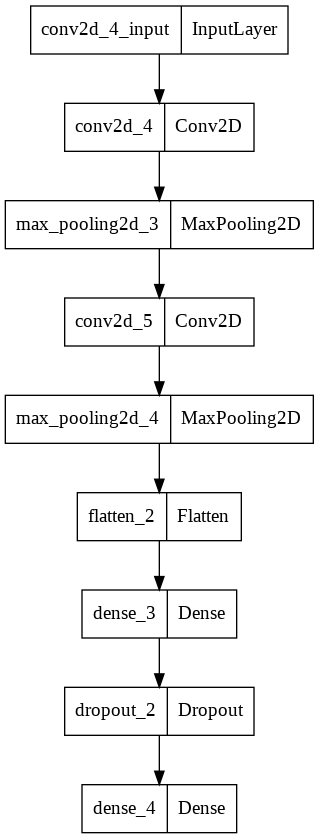

In [25]:
keras.utils.plot_model(model)

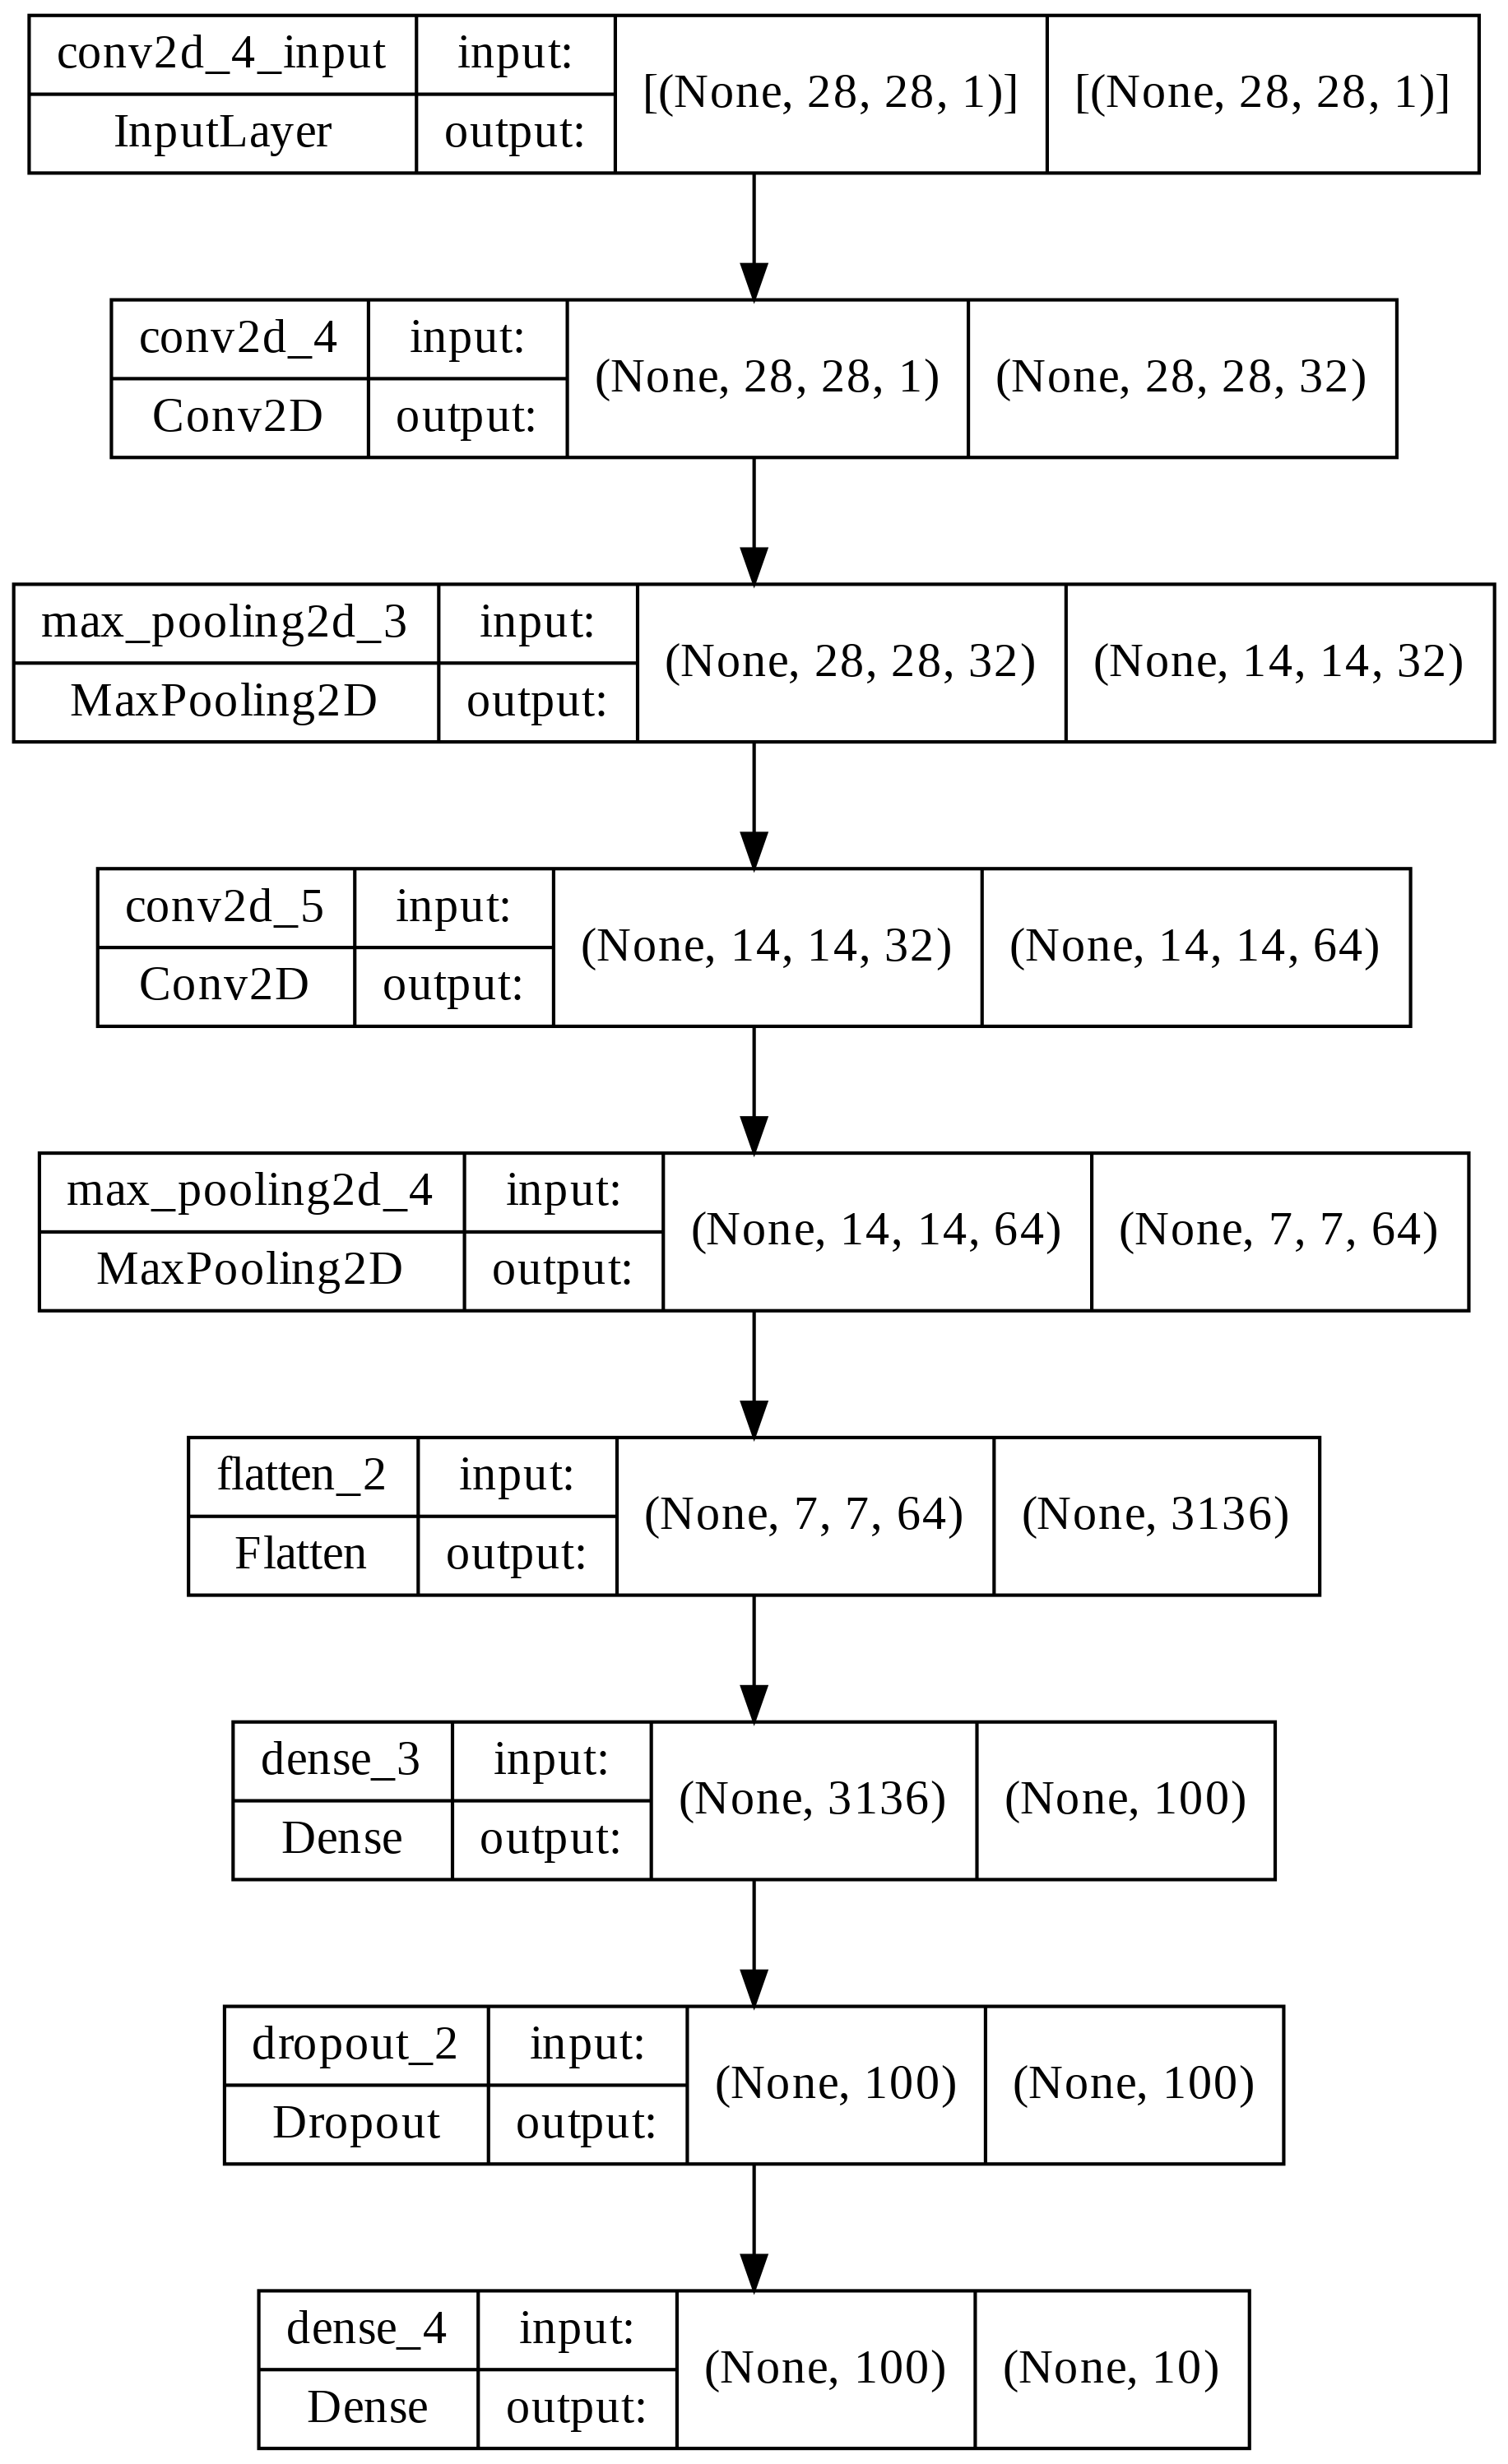

In [26]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

## 모델 컴파일과 훈련

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 93s 61ms/step - loss: 0.5451 - accuracy: 0.8019 - val_loss: 0.3434 - val_accuracy: 0.8767
Epoch 2/20
1500/1500 [==============================] - 88s 58ms/step - loss: 0.3609 - accuracy: 0.8714 - val_loss: 0.2874 - val_accuracy: 0.8923
Epoch 3/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.3097 - accuracy: 0.8884 - val_loss: 0.2819 - val_accuracy: 0.8967
Epoch 4/20
1500/1500 [==============================] - 87s 58ms/step - loss: 0.2751 - accuracy: 0.9003 - val_loss: 0.2527 - val_accuracy: 0.9069
Epoch 5/20
1500/1500 [==============================] - 87s 58ms/step - loss: 0.2497 - accuracy: 0.9088 - val_loss: 0.2462 - val_accuracy: 0.9104
Epoch 6/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2288 - accuracy: 0.9165 - val_loss: 0.2328 - val_accuracy: 0.9158
Epoch 7/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2115 - accuracy: 0.9218 - val_loss: 0.2363 -

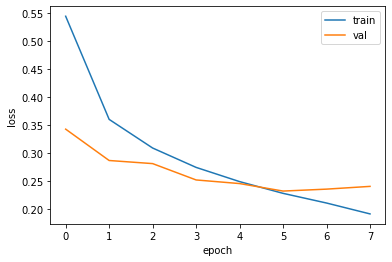

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 13ms/step - loss: 0.2328 - accuracy: 0.9158


[0.2328365445137024, 0.9157500267028809]

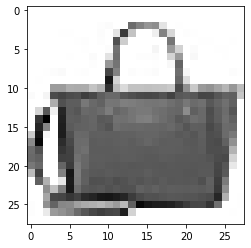

In [33]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [34]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[7.0684539e-13 2.1339903e-19 1.6567226e-14 1.9787884e-13 1.7695283e-15
  3.4561614e-14 9.1672004e-14 4.4798839e-12 1.0000000e+00 6.2627963e-12]]


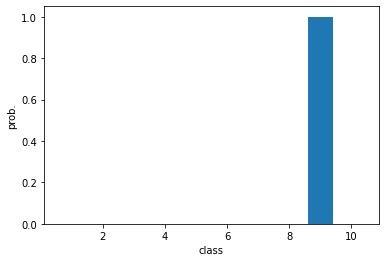

In [35]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [36]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [38]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [39]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [40]:
model.evaluate(train_scaled, train_target)

1500/1500 [==============================] - 17s 12ms/step - loss: 0.1686 - accuracy: 0.9365


[0.16863398253917694, 0.9365000128746033]